Objective of this notebook: figure out how to normalize the features so that they don't explode the gradients on neural networks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
all_features = [
    np.load(os.path.join('../data/interim/X', basename))
    for basename in os.listdir('../data/interim/X')
]

In [3]:
concatenated = np.concatenate(all_features)

In [4]:
feature_groups = {
    "mean": concatenated[:, 0:18].ravel(),
    "variance": concatenated[:, 18:36].ravel(),
    "skewness": concatenated[:, 36:54].ravel(),
    "kurtosis": concatenated[:, 54:72].ravel(),
    "stdev": concatenated[:, 72:90].ravel(),
    "zerocross": concatenated[:, 90:108].ravel(),
    "peak2peak": concatenated[:, 108:126].ravel(),
    "totalarea": concatenated[:, 126:144].ravel(),
    "sigenergy": concatenated[:, 144:162].ravel(),
    "energypct": concatenated[:, 162:270].ravel(),
    "avgdwtcoef": concatenated[:, 270:396].ravel(),
    "crosscorr": concatenated[:, 396:549].ravel(),
    "decorrcoef": concatenated[:, 549:567].ravel(),
    "clustcoef": concatenated[:, 567:585].ravel(),
    "localeff": concatenated[:, 585:603].ravel(),
    "between": concatenated[:, 603:621].ravel(),
    "eccentricity": concatenated[:, 621:639].ravel(),
    "globaleff": concatenated[:, 639],
    "globaldiam": concatenated[:, 640],
    "globalrad": concatenated[:, 641],
    "globalcharpath": concatenated[:, 642]
}

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


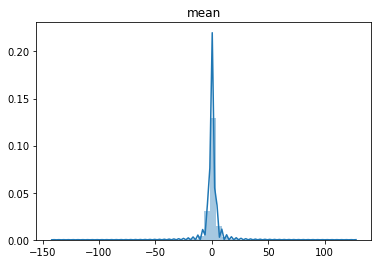

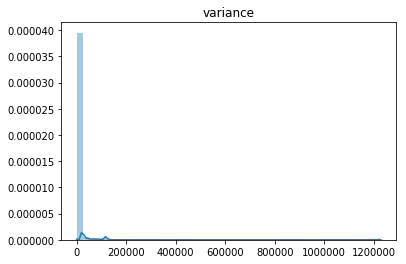

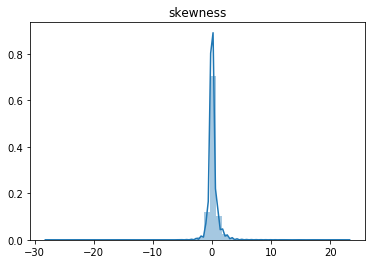

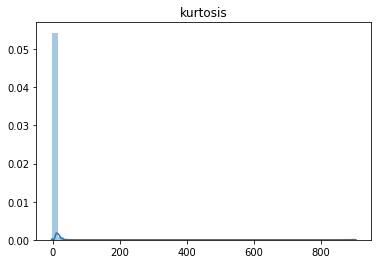

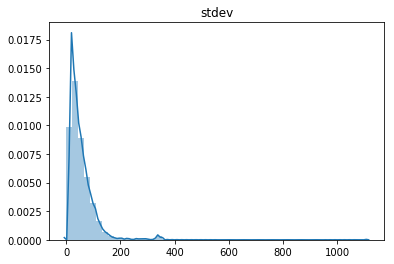

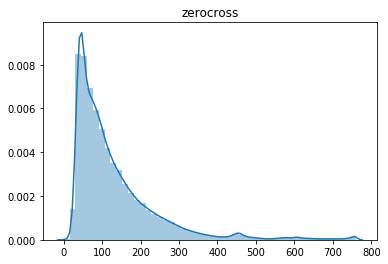

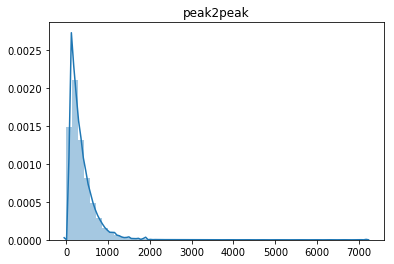

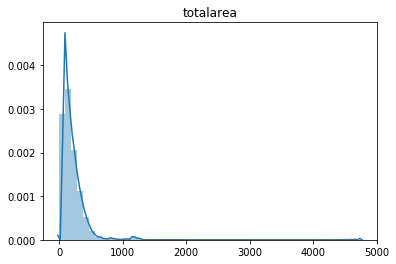

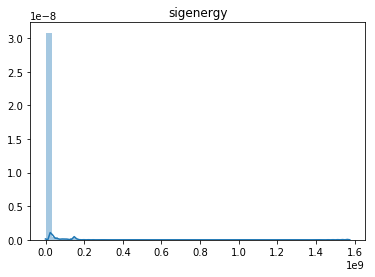

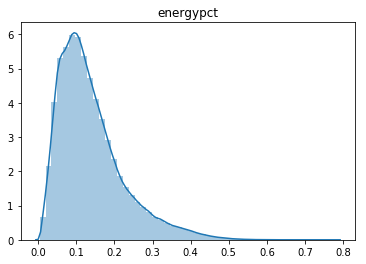

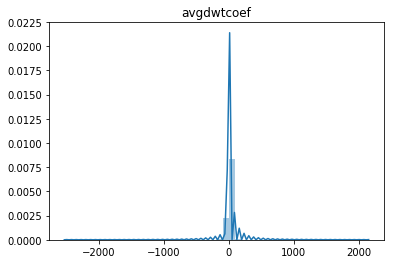

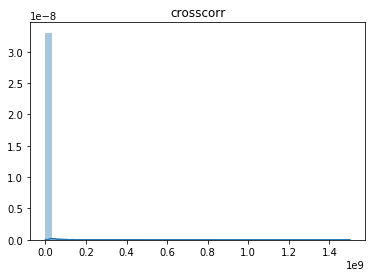

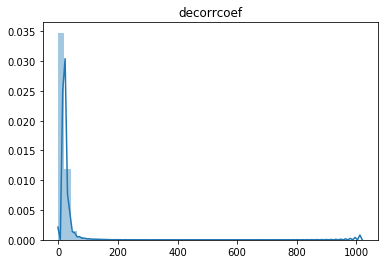

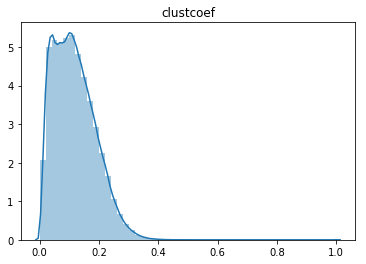

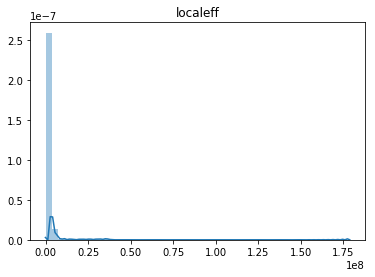

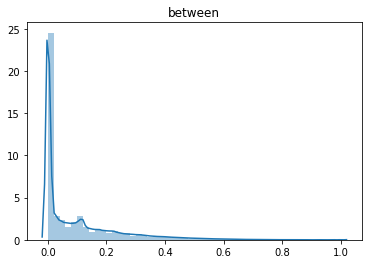

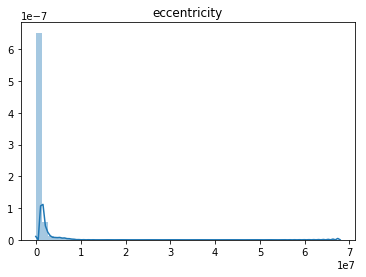

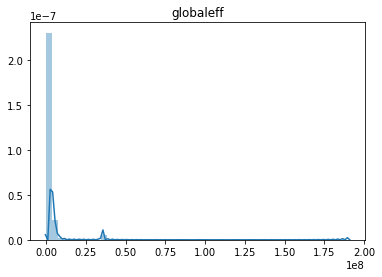

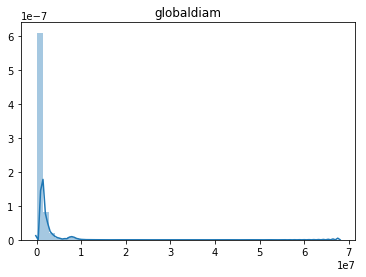

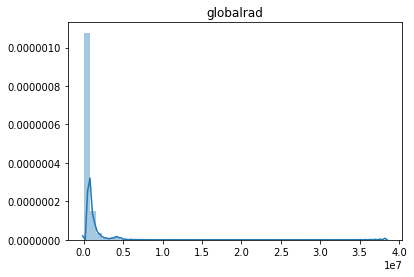

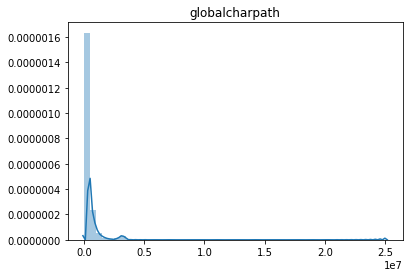

In [5]:
for (name, array) in feature_groups.items():
    plt.title(name)
    sns.distplot(array)
    plt.show()

In [22]:
sums = np.array([np.sum(features) for features in concatenated])

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


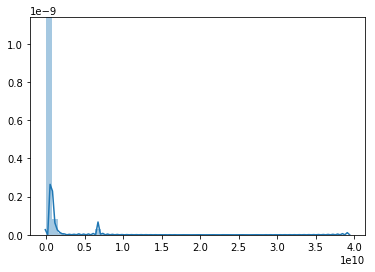

In [23]:
sns.distplot(sums)
plt.show()

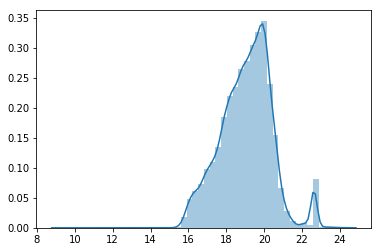

In [26]:
sns.distplot(np.log(sums))

In [6]:
import scipy.stats

In [48]:
hownormal = {k: scipy.stats.normaltest(v) for (k, v) in feature_groups.items()}
hownormal

{'mean': NormaltestResult(statistic=381737.1167835812, pvalue=0.0),
 'variance': NormaltestResult(statistic=2363522.632153112, pvalue=0.0),
 'skewness': NormaltestResult(statistic=423923.7798367973, pvalue=0.0),
 'kurtosis': NormaltestResult(statistic=3001618.6157204844, pvalue=0.0),
 'stdev': NormaltestResult(statistic=968596.3655442013, pvalue=0.0),
 'zerocross': NormaltestResult(statistic=525295.699419779, pvalue=0.0),
 'peak2peak': NormaltestResult(statistic=820001.0665394594, pvalue=0.0),
 'totalarea': NormaltestResult(statistic=1067493.2623619493, pvalue=0.0),
 'sigenergy': NormaltestResult(statistic=2362754.0588320135, pvalue=0.0),
 'energypct': NormaltestResult(statistic=1884453.8305497074, pvalue=0.0),
 'avgdwtcoef': NormaltestResult(statistic=3543177.6743450062, pvalue=0.0),
 'crosscorr': NormaltestResult(statistic=24564327.643044017, pvalue=0.0),
 'decorrcoef': NormaltestResult(statistic=1570713.6727521317, pvalue=0.0),
 'clustcoef': NormaltestResult(statistic=112144.6834073

In [36]:
means = feature_groups['mean']
normalized_means = (means - means.mean()) / means.std()
trimmed_means = means[np.logical_and(normalized_means > -3, normalized_means < 3)]
trimmed_means.min(), trimmed_means.max()

(-15.544871794871796, 15.993589743589746)

In [37]:
def clip_outliers(xs):
    normalized = (xs - xs.mean()) / xs.std()
    trimmed = xs[np.logical_and(normalized > -3, normalized < 3)]
    return trimmed

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


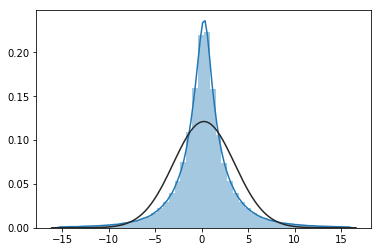

In [45]:
sns.distplot(clip_outliers(feature_groups['mean']), fit=scipy.stats.norm)
plt.savefig('means.png')

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


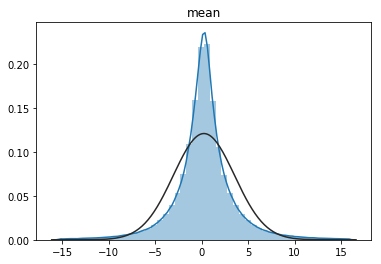

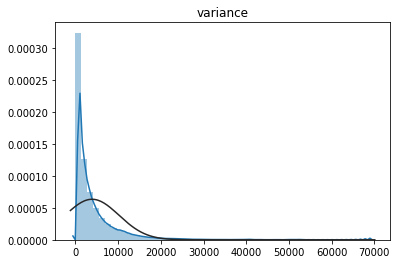

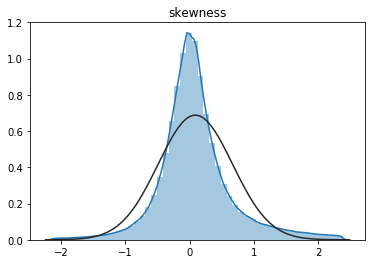

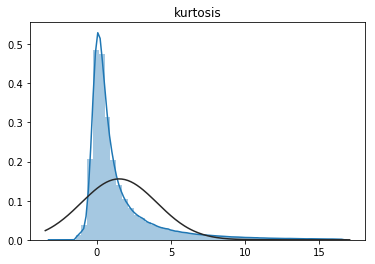

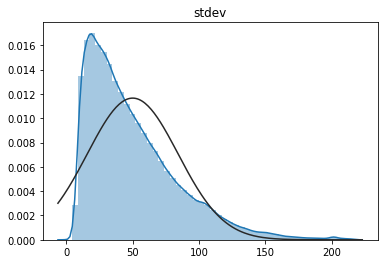

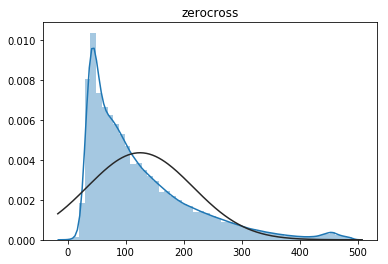

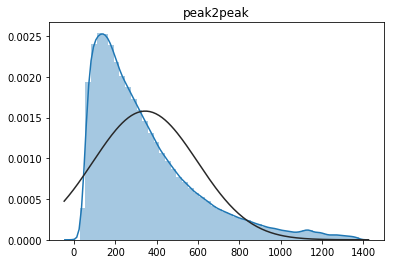

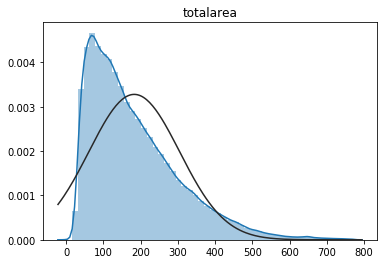

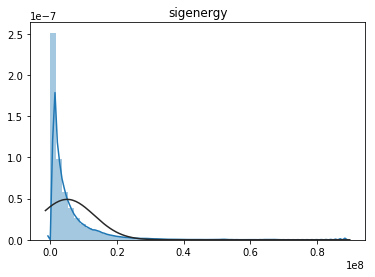

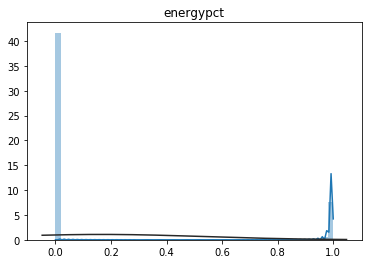

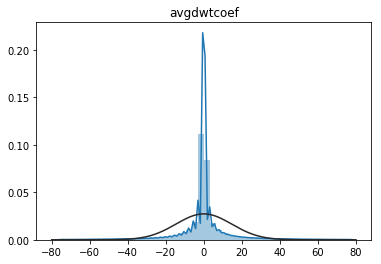

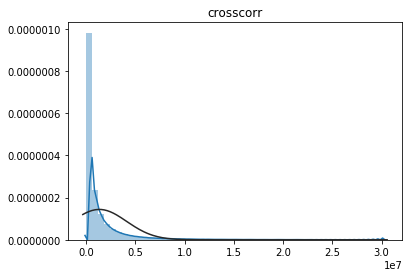

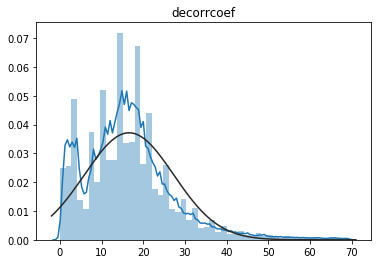

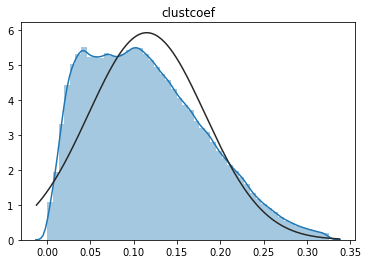

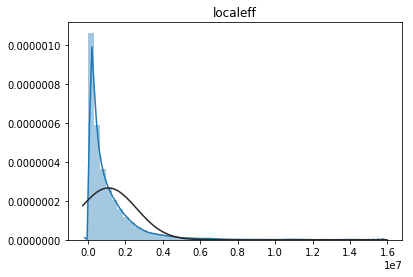

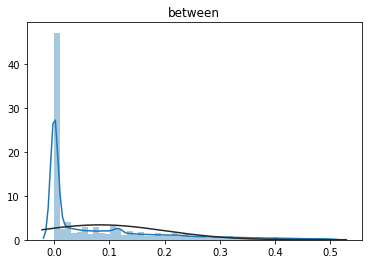

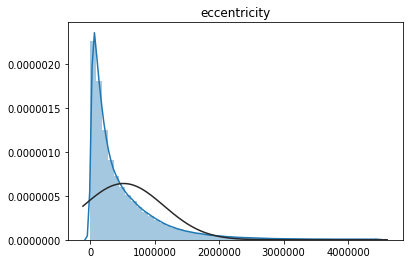

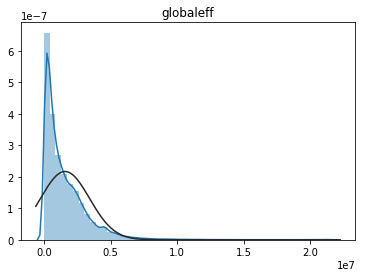

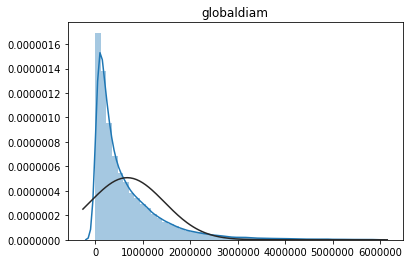

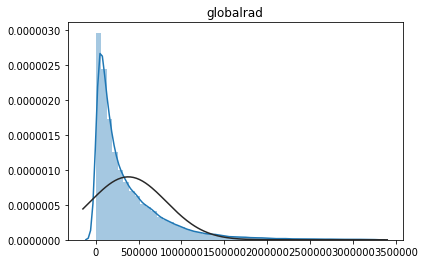

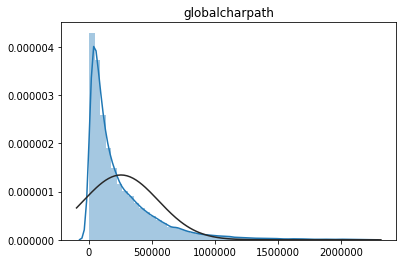

In [46]:
for (name, array) in feature_groups.items():
    plt.title(name)
    sns.distplot(clip_outliers(array), fit=scipy.stats.norm)
    plt.show()

In [56]:
# The formula in there is based on the cdf for the chi-squared distribution
# These are the negative base-ten logarithms of the p-values on normality
sorted([(result.statistic/2 * np.log10(np.exp(1)), name) for (name, result) in hownormal.items()])

[(17268.668853764506, 'globaleff'),
 (19610.699331264612, 'globalcharpath'),
 (20218.55470067322, 'globalrad'),
 (20381.67756679766, 'globaldiam'),
 (24351.90858930372, 'clustcoef'),
 (82893.16167838327, 'mean'),
 (87035.33507179063, 'between'),
 (92053.87916534503, 'skewness'),
 (114066.5118127596, 'zerocross'),
 (178060.9691764342, 'peak2peak'),
 (210328.02837369582, 'stdev'),
 (231803.21665634742, 'totalarea'),
 (339203.2940798705, 'localeff'),
 (341076.1403631204, 'decorrcoef'),
 (371124.0511389571, 'eccentricity'),
 (409203.9500045917, 'energypct'),
 (513065.5249226273, 'sigenergy'),
 (513232.4184987729, 'variance'),
 (651793.2007927418, 'kurtosis'),
 (769391.2561854166, 'avgdwtcoef'),
 (5334075.973518765, 'crosscorr')]

Me a few minutes ago: Hopefully my stats are normally distributed.

Me now: "the cross-correlations are not normally distributed (p < 10^-5000000)"

You know what, screw it. I'm just going to pretend that this normalization is sufficient and call it a day.

In [59]:
concatenated.mean(axis=0)
concatenated.std(axis=0)

(643,)

In [90]:
no_variation = set((concatenated.std(axis=0) == 0).nonzero()[0])

In [91]:
all_energy_percentage = set(np.arange(162, 270))

In [92]:
no_variation - all_energy_percentage

set()

In [102]:
energy_pct_with_variation = list(all_energy_percentage - no_variation)
energy_pct_with_variation

[192,
 162,
 258,
 228,
 198,
 168,
 264,
 234,
 204,
 174,
 240,
 210,
 180,
 246,
 216,
 186,
 252,
 222]

In [103]:
concatenated[:, energy_pct_with_variation]

array([[0.98661857, 0.98282635, 0.9885906 , ..., 0.98926078, 0.98737696,
        0.99396104],
       [0.99456367, 0.99391786, 0.99714786, ..., 0.99348162, 0.98940124,
        0.99670221],
       [0.99427292, 0.99427709, 0.991005  , ..., 0.99728547, 0.99321887,
        0.99589678],
       ...,
       [0.98639018, 0.98864689, 0.99199216, ..., 0.98817506, 0.99750313,
        0.97620123],
       [0.99504751, 0.98552148, 0.98784263, ..., 0.98754402, 0.99335753,
        0.99646345],
       [0.9960819 , 0.99353689, 0.99405132, ..., 0.98605884, 0.9953313 ,
        0.99643041]])

Turns out I did the energies wrong. Look in the next notebook for the fix.

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


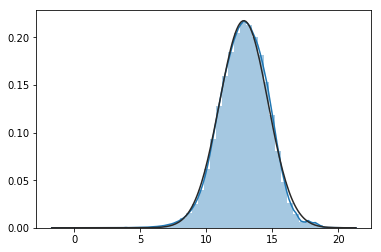

In [10]:
sns.distplot(np.log(feature_groups['crosscorr']), fit=scipy.stats.norm)

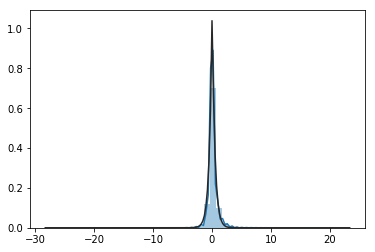

In [13]:
sns.distplot(feature_groups['skewness'], fit=scipy.stats.laplace)

In [15]:
np.quantile?

Signature:
np.quantile(
    ['a', 'q', 'axis=None', 'out=None', 'overwrite_input=False', "interpolation='linear'", 'keepdims=False'],
)
Docstring:
Compute the q-th quantile of the data along the specified axis.
..versionadded:: 1.15.0

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
q : array_like of float
    Quantile or sequence of quantiles to compute, which must be between
    0 and 1 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the quantiles are computed. The
    default is to compute the quantile(s) along a flattened
    version of the array.
out : ndarray, optional
    Alternative output array in which to place the result. It must
    have the same shape and buffer length as the expected output,
    but the type (of the output) will be cast if necessary.
overwrite_input : bool, optional
    If True, then allow the input array `a` to be modified by intermediate
    calculations, to save memory

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

In [42]:
xs = feature_groups['skewness']
normed = scipy.stats.norm.ppf(ECDF(xs)(0.999999 * xs))

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


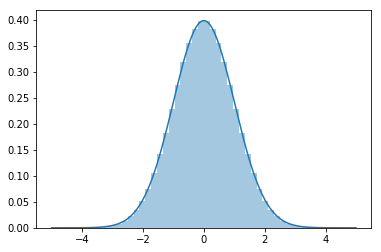

In [44]:
sns.distplot(normed)

In [47]:
all_normalized_features = np.concatenate([
    np.load(os.path.join('../data/processed/train/X', basename))
    for basename in os.listdir('../data/processed/train/X')
])

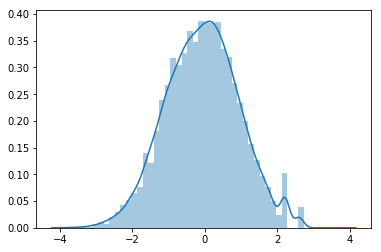

In [51]:
sns.distplot(all_normalized_features[:, 91])

Okay, so after doing the transformation it appears that there are still issues with some of them blowing up to infinity. Specifically, it happened to these categories:

* Area
* Total energy
* Energy percentages
* Cross-correlations
* Clustering coefficients
* Eccentricities
* Global diameters
* Global radii
* Global characteristic paths

I'm going to try to debug the problem using the global diameters, since that doesn't have any weird aggregation effects. Hopefully the solution will transfer.

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


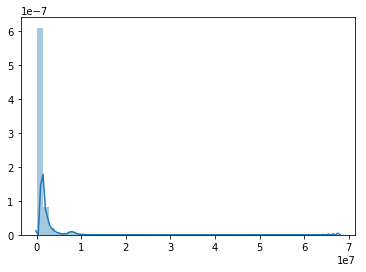

In [56]:
sns.distplot(feature_groups['globaldiam'])

In [57]:
feature_groups['globaldiam'].sort()

In [58]:
feature_groups['globaldiam'][:10], feature_groups['globaldiam'][-10:]

(array([   48.85197559,    48.85197559,    48.85197559,   180.14166   ,
         4875.73248892,  5267.15894335,  8444.75096197,  8930.75178789,
        10026.94432145, 10584.84914895]),
 array([41635698.27583893, 43026190.26210529, 43563036.98754102,
        43732572.42564787, 45070469.64984547, 46527117.01962399,
        54881637.33311865, 58678590.4797685 , 64494238.7193054 ,
        67846678.98103796]))

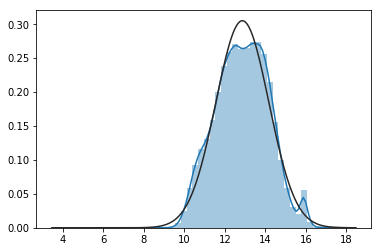

In [60]:
sns.distplot(np.log(feature_groups['globaldiam']), fit=scipy.stats.norm)

In [61]:
ecdf_globaldiam = ECDF(feature_groups['globaldiam'])

In [74]:
xs = feature_groups['globaldiam']
xs_new = xs + 0.000001 * np.sign(np.median(xs) - xs)

In [78]:
scipy.stats.norm.ppf(ecdf_globaldiam(xs_new.min()))

-3.9408057158542875

Okay, so I think I see the problem. I need to nudge everything a bit closer to the middle, not just down a little bit. If the values are on both sides of 0, just multiplication accomplishes that effect.

That solution addresses all those problems, but then goes on to create new ones. Round 2:
- Skewness
- Kurtosis
- DWT
- Betweenness centrality

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


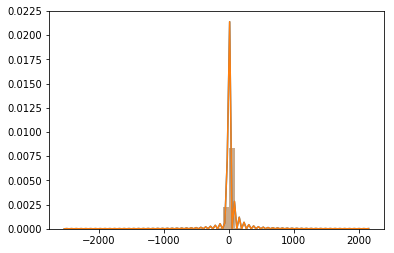

In [83]:
xs = feature_groups['avgdwtcoef']
xs_new = xs + 0.000001 * np.sign(np.median(xs) - xs)
sns.distplot(xs)
sns.distplot(xs_new)

In [84]:
ecdf = ECDF(xs)
ecdf(xs_new.min()), ecdf(xs_new.max())

(1.0741849299588459e-07, 0.999999892581507)

/usr/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


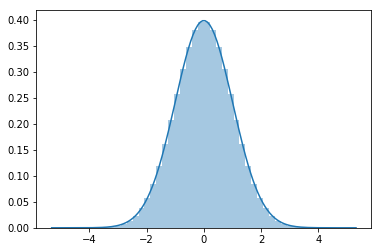

In [85]:
sns.distplot(scipy.stats.norm.ppf(ECDF(xs)(xs_new)))

In [89]:
xs = np.concatenate(all_features)[:, 38]
xs_new = xs + 0.000001 * np.sign(np.median(xs) - xs)
ecdf = ECDF(xs)
np.isfinite(scipy.stats.norm.ppf(ECDF(xs)(xs_new))).all()

True

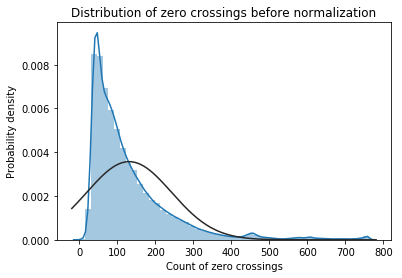

In [18]:
sns.distplot(feature_groups['zerocross'], fit=scipy.stats.norm)
plt.title('Distribution of zero crossings before normalization')
plt.xlabel('Count of zero crossings')
plt.ylabel('Probability density')
plt.savefig('zerocross-before.png')
plt.show()

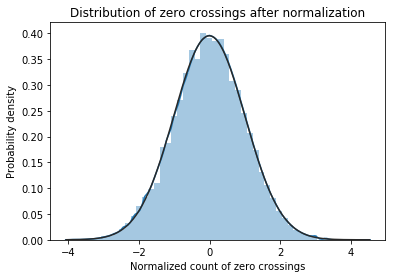

In [20]:
sns.distplot(
    scipy.stats.norm.ppf(
        ECDF(feature_groups['zerocross'])(0.999999 * feature_groups['zerocross'])
    ), fit=scipy.stats.norm)
plt.title('Distribution of zero crossings after normalization')
plt.xlabel('Normalized count of zero crossings')
plt.ylabel('Probability density')
plt.savefig('zerocross-after.png')
plt.show()